In [1]:
import json

In [2]:
import torch

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.load('../dataset/pocket_to_score.pt')

{'4xe6_X': -9.16248,
 '1k1j_A': -8.04213,
 '5ai4_A': -5.77866,
 '4a9s_A': -7.14738,
 '1rqp_A': -9.48545,
 '5acc_A': -9.59112,
 '1y9r_A': -9.97749,
 '3owj_A': -7.63904,
 '2jau_A': -3.35329,
 '5tf9_A': -9.32077,
 '4mk4_A': -7.17803,
 '3ant_A': -8.4448,
 '5pnx_A': -6.75303,
 '3ccw_A': -6.73871,
 '2xh0_B': -3.81769,
 '2wzh_A': -6.84894,
 '1nsc_A': -5.91691,
 '4i29_A': -5.50493,
 '4y2r_A': -7.4334,
 '4l7d_A': -9.43121,
 '4lag_X': -8.13682,
 '2ode_A': -9.13074,
 '1qbu_A': None,
 '1gs5_A': -4.86705,
 '1kjx_A': -7.30077,
 '3hwf_A': -5.06362,
 '4uzh_A': -8.25741,
 '5enr_C': -12.60652,
 '5n5j_A': -6.88654,
 '2c3k_A': -10.15923,
 '3g11_A': -7.50944,
 '4kpd_A': -4.80136,
 '5f0h_A': -9.87314,
 '4qo7_B': -2.87945,
 '1zui_A': -6.61608,
 '1fm6_U': None,
 '2vwl_A': -9.4396,
 '3mos_A': -4.63775,
 '5up0_A': -5.11572,
 '5k4k_K': -4.56338,
 '4dk5_A': -7.41564,
 '2yfj_A': -7.834,
 '4rr4_A': -9.11184,
 '4kqi_A': -8.33225,
 '5coi_A': -7.60131,
 '5hyk_A': -2.30683,
 '4zaa_A': -4.97334,
 '2viq_A': -7.70837,
 '4

In [7]:
eval_path = '../misc/evaluations/20240124_0.0_zinc-mo-256_evaluated.json'

In [8]:
with open(eval_path, 'r') as f:
    eval_data = json.load(f)

In [10]:
def is_novel_hit(novelty, qed, sas, docking_score, native_docking_score):
    if novelty > 0.6 and qed > 0.5 and sas > 0.5 and docking_score < -8:
        return True
    return False 

In [12]:
dock = False
all_vals = {
    'time': [],
    'qeds': [],
    'sas': [],
    'preds': [],
    'diversity': [],
    'novelty': [],
}
if dock:
    all_vals['docking_scores'] = []
    all_vals['is_hit'] = []

for key, val in eval_data.items():
    all_vals['time'].append(val['time'])
  
    all_vals['qeds'].extend(val['qeds'])
    all_vals['sas'].extend(val['sas'])
    all_vals['preds'].extend(val['preds']) 
    all_vals['diversity'].extend(val['diversity'])
    all_vals['novelty'].extend(val['novelty'])
    if dock:
        all_vals['docking_scores'].extend([v for v in val['docking_scores'] if v < 0])
        
    native_docking_score = val['native_docking_score']
    
    if dock and native_docking_score:
        hit_list = []
        for i in range(len(val['qeds'])):
            hit = is_novel_hit(val['novelty'][i], val['qeds'][i], val['sas'][i], val['docking_scores'][i], native_docking_score)
            hit_list.append(hit)
            
        # print(native_docking_score)
        # print(f'{key} has {sum(hit_list)} hits')
        all_vals['is_hit'].extend(hit_list)

In [13]:
# len([v for v in all_vals['is_hit'] if v])

KeyError: 'is_hit'

In [14]:
# len(all_vals['is_hit'])    

In [15]:
# import matplotlib.pyplot as plt

# plt.hist(all_vals['qeds'], bins=50)

In [16]:
import numpy as np
# Temp 1.0
for key, val in all_vals.items():
    print(key, np.mean(val))

time 5.4532810497283934
qeds 0.5676739178261949
sas 0.7254297790511915
preds -9.074928320740163
diversity 0.5909492590526236
novelty 0.48333923671776746


Pred vs Actual Docking Scores

In [200]:
# plt.scatter(all_vals['preds'], all_vals['docking_scores'])

In [14]:
# from itertools import chain
# smis_list = list(chain.from_iterable(smis))
# smis = [val['smiles'] for k, val in eval_data.items()]
# len(smis_list), len(set(smis_list))

QED vs Docking scores

In [201]:
# scatter plot
import matplotlib.pyplot as plt

plt.scatter(all_vals['qeds'], all_vals['docking_scores'])

KeyError: 'docking_scores'

SAS vs Docking Scores

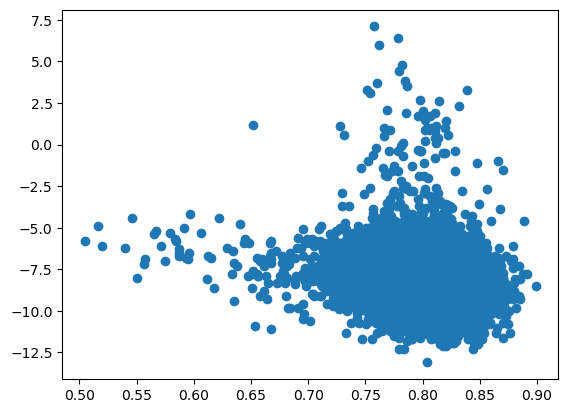

In [12]:
plt.scatter(all_vals['sas'], all_vals['docking_scores'])

In [13]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

def visualize(data):
    mols = [Chem.MolFromSmiles(smi) for smi in data['smiles']]
    return MolsToGridImage(mols, legends=[f'QED: {data["qeds"][i]:.2f} Dock: {data["docking_scores"][i]:.2f}' for i, mol in enumerate(mols)])

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


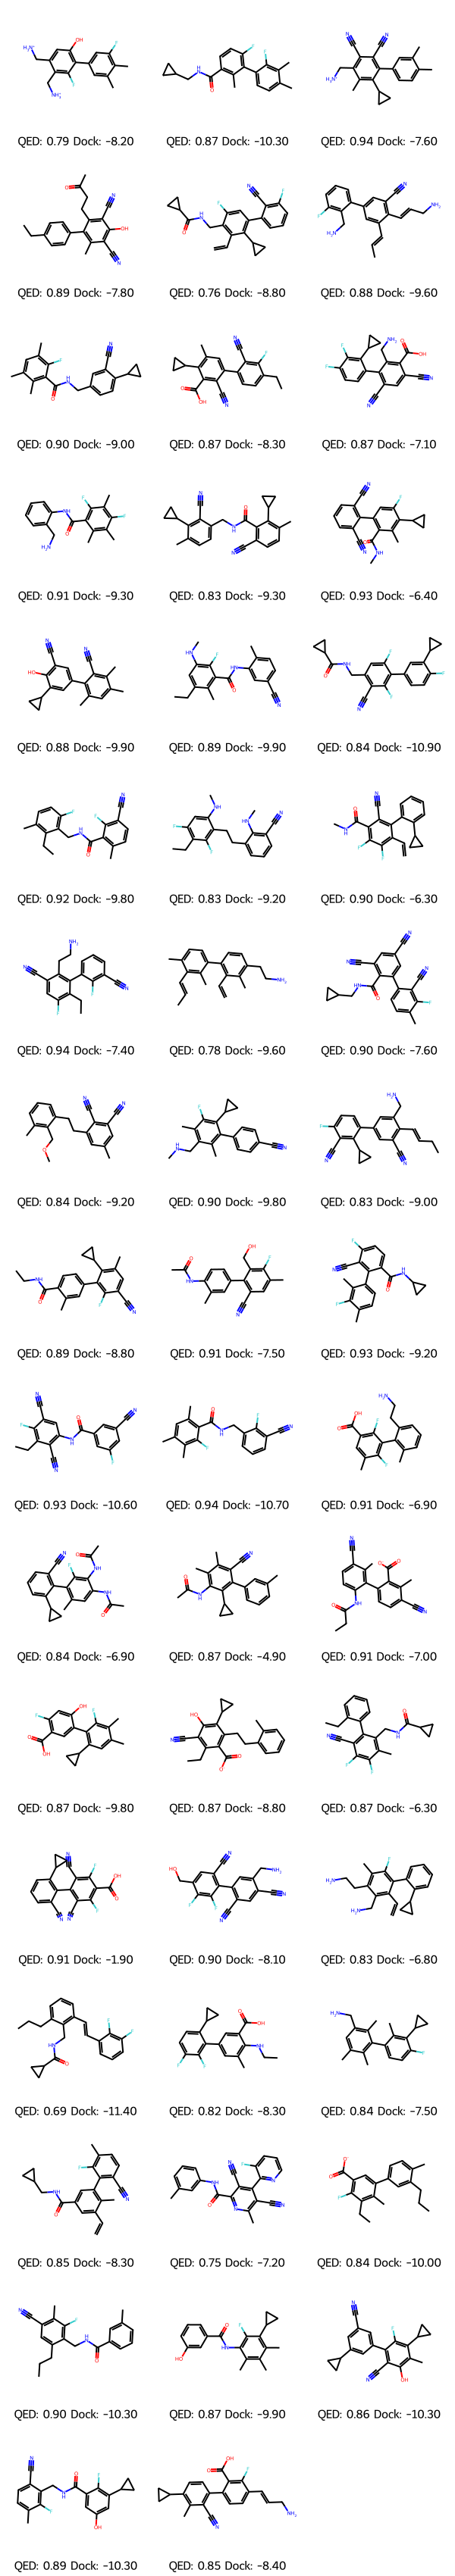

In [14]:
visualize(eval_data['1l3l_A'])